# Exercise 3 - MRI helper functions

In [1]:
import torch
from Fast_MRI_dataloader import create_dataloaders
from tqdm import tqdm 
import matplotlib.pyplot as plt
from torch.fft import fft2, fftshift, ifft2

## Exercise 3a
Create a Python function that, given an MRI image, calculates the K-space.
Make sure to only use PyTorch functions and that the function can work on multiple
images in parallel. Visualize a ground truth image with its accompanying full k-space
measurement.
hint: make sure that the DC (i.e., 0 Hz component) is at the center of the image.
Moreover, plotting the log of the absolute value of the k-space provides better contrast.

  2%|▏         | 1/41 [00:00<00:06,  5.82it/s]


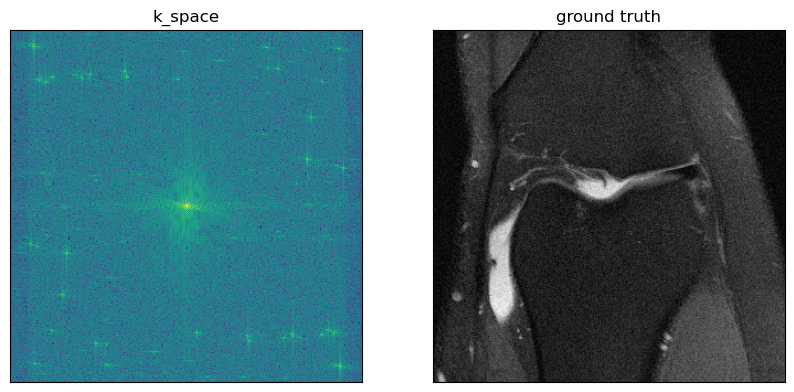

In [6]:
def get_k_space(input) :
    # get the k-space
    k_space = fftshift(fft2(input))
    return k_space
    
# define parameters
data_loc = '5LSL0-Datasets//Fast_MRI_Knee' #change the datalocation to something that works for you
batch_size = 6

train_loader, test_loader = create_dataloaders(data_loc, batch_size)

# go over the dataset
for i,(kspace, M, gt) in enumerate(tqdm(test_loader)):
    if i == 1:
        break

k_space = get_k_space(gt)
        
kspace_plot_friendly = torch.log(torch.abs(k_space[0,:,:])+1e-20)

plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
plt.imshow(kspace_plot_friendly,vmin=-2,interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('k_space')

plt.subplot(1,2,2)
plt.imshow(gt[0,:,:],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('ground truth')

plt.savefig("images/exc_3a.png",dpi=300,bbox_inches='tight')
plt.show()

## Exercise 3b
Create a Python function that, given a full k-space and measurement matrix,
calculates the partial k-space.

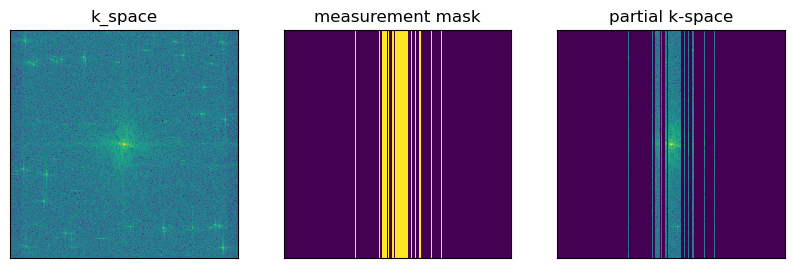

In [8]:
def get_partial_k_space(input,M) :
    return  torch.mul(input, M)

par_k_space = get_partial_k_space(k_space, M)

par_k_space_friendly = torch.log(torch.abs(par_k_space[0,:,:])+1e-20)

plt.figure(figsize = (10,10))

plt.subplot(1,3,1)
plt.imshow(kspace_plot_friendly,vmin=-2,interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('k_space')

plt.subplot(1,3,2)
plt.imshow(M[0,:,:],interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('measurement mask')

plt.subplot(1,3,3)
plt.imshow(par_k_space_friendly,vmin=-2,interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('partial k-space')

plt.savefig("images/exc_3b.png",dpi=300,bbox_inches='tight')
plt.show()

## Exercise 3c

Create a Python function that, given a partial k-space, calculates the accel-
erated measurement image. Visualize a partial k-space with its accompanying accel-
erated MRI.

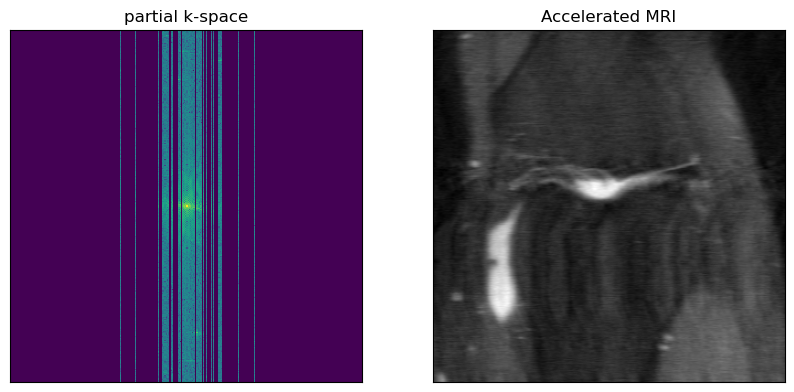

In [9]:
def get_accelerate_MRI(input) :
    return ifft2(input)

fastmri = get_accelerate_MRI(par_k_space)
fastmri_plot = torch.abs(fastmri[3,:,:])

plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
plt.imshow(par_k_space_friendly,vmin=-2,interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('partial k-space')

plt.subplot(1,2,2)
plt.imshow(fastmri_plot,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Accelerated MRI')

plt.savefig("images/exc_3c.png",dpi=300,bbox_inches='tight')
plt.show()

## Exercise 3d

Recreate the pipeline image shown above for a different MRI image.
hint: for the best result, use the same ’vmin’ and ’vmax’ for the full and partial k-space
images.

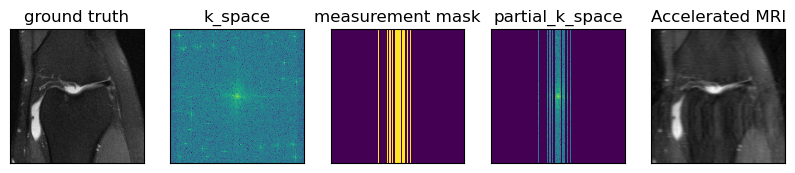

In [11]:
plt.figure(figsize = (10,10))

plt.subplot(1,5,1)
plt.imshow(gt[0,:,:],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('ground truth')

plt.subplot(1,5,2)
plt.imshow(kspace_plot_friendly,vmin=-2,interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('k_space')

plt.subplot(1,5,3)
plt.imshow(M[0,:,:],interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('measurement mask')

plt.subplot(1,5,4)
plt.imshow(par_k_space_friendly,vmin=-2,interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('partial_k_space')

plt.subplot(1,5,5)
plt.imshow(fastmri_plot,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Accelerated MRI')


plt.savefig("images/exc_3d.png",dpi=300,bbox_inches='tight')
plt.show()

# Exercise 3e

In the accelerated MRI image it looks as though the same image is overlayed
several times, what is this effect called, and why does it only happen in the horizontal
direction?

The effect is called "Gibbs ringing" or simply "ringing artifacts." Gibbs ringing is a common artifact that occurs in images reconstructed from undersampled or accelerated MRI data.

Gibbs ringing appears as oscillatory or wavy patterns around sharp edges or high-contrast structures in the image. It is more prominent in the horizontal direction because MRI data acquisition typically involves a phase-encoding step that encodes spatial information along the frequency-encoding direction (which is often horizontal). When this phase-encoding step is undersampled or accelerated, it leads to incomplete sampling of the k-space data, causing Gibbs ringing artifacts to manifest predominantly in the frequency-encoding direction (horizontal).